# Atmospheric CO2 Concentration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mod.unique_value import checking_unique_value

In [6]:
atmospheric_CO2_Concentrations_df = pd.read_csv('./Atmospheric_CO2_Concentrations.csv')
atmospheric_CO2_Concentrations_df = pd.DataFrame(atmospheric_CO2_Concentrations_df)
atmospheric_CO2_Concentrations_df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.86


In [7]:
atmospheric_CO2_Concentrations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             1570 non-null   int64  
 1   Country              1570 non-null   object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 1570 non-null   object 
 4   Indicator            1570 non-null   object 
 5   Unit                 1570 non-null   object 
 6   Source               1570 non-null   object 
 7   CTS_Code             1570 non-null   object 
 8   CTS_Name             1570 non-null   object 
 9   CTS_Full_Descriptor  1570 non-null   object 
 10  Date                 1570 non-null   object 
 11  Value                1570 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 147.3+ KB


In [8]:
atmospheric_CO2_Concentrations_df.describe().round(2)

,ObjectId,ISO2,Value
count,1570.00,0.0,1570.00
mean,785.50,NaN,180.72
std,453.36,NaN,180.55
min,1.00,NaN,-0.10
25%,393.25,NaN,0.45
50%,785.50,NaN,313.83
75%,1177.75,NaN,355.07
max,1570.00,NaN,424.00


In [9]:
checking_unique_value(atmospheric_CO2_Concentrations_df)

Unique values in column 'ObjectId': 1570
Unique values in column 'Country': 1
Unique values in column 'ISO2': 0
Unique values in column 'ISO3': 1
Unique values in column 'Indicator': 2
Unique values in column 'Unit': 2
Unique values in column 'Source': 1
Unique values in column 'CTS_Code': 1
Unique values in column 'CTS_Name': 1
Unique values in column 'CTS_Full_Descriptor': 1
Unique values in column 'Date': 791
Unique values in column 'Value': 868


In [10]:
atmospheric_CO2_Concentrations_df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Date', 'Value'],
      dtype='object')

In [11]:
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']

In [12]:
df = atmospheric_CO2_Concentrations_df.drop(columns=columns_to_drop, axis='columns')
df

,Date,Value
0,1958M03,315.70
1,1958M04,317.45
2,1958M05,317.51
3,1958M06,317.24
4,1958M07,315.86
...,...,...
1565,2023M11,0.72
1566,2023M12,421.86
1567,2023M12,0.68
1568,2024M01,0.68


# On identifie les valeurs manquantes

In [13]:
blank_counts = df.isnull().sum()
blank_counts.sum()

0

# On identifie les valeurs aberrantes

<Axes: xlabel='Date', ylabel='Value'>

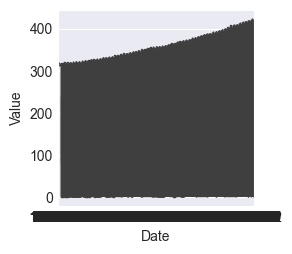

In [29]:
sns.boxplot(df, x='Date', y='Value')

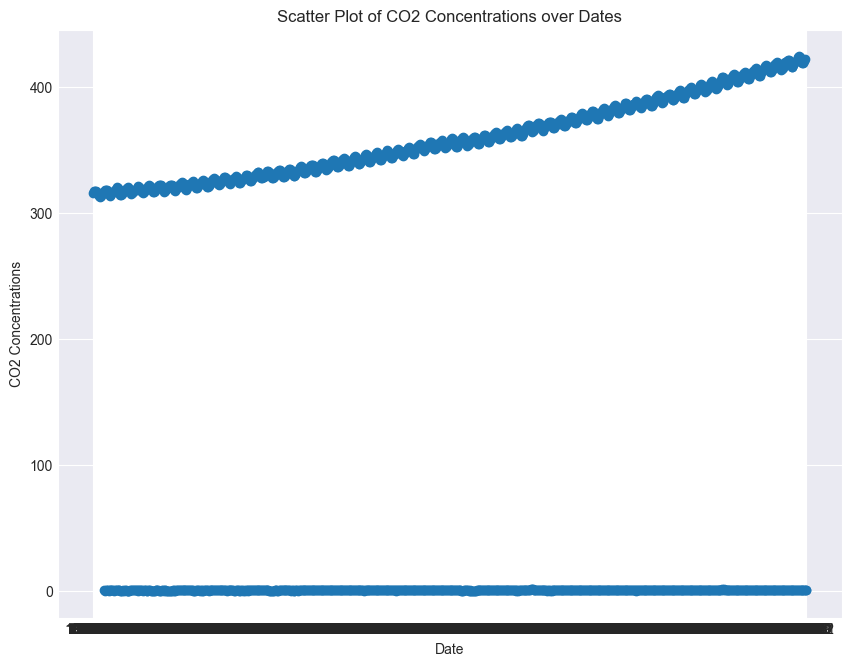

In [25]:
plt.style.use('_mpl-gallery')

x = df['Date']
y = df['Value']

# Plot
plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('CO2 Concentrations')
plt.title('Scatter Plot of CO2 Concentrations over Dates')
plt.grid(True)  # Add gridlines if needed
plt.show()

##### On observe que régulièrement deux valeurs sont prélevées à la même date. Parmi ces deux valeurs une semble être représentative de la concentration de CO2 dans l'air à instant donné et l'autre aberrante. Nous allons donc supprimer les valeurs aberrantes de notre DataFrame initial. 

In [69]:
outlier_indices = np.where(df['Value'] < 2)
no_outliers_df = df.drop(outlier_indices[0])
no_outliers_df

,Date,Value,Year
0,1958M03,315.70,1958
1,1958M04,317.45,1958
2,1958M05,317.51,1958
3,1958M06,317.24,1958
4,1958M07,315.86,1958
...,...,...,...
1558,2023M08,419.68,2023
1560,2023M09,418.51,2023
1562,2023M10,418.82,2023
1564,2023M11,420.46,2023


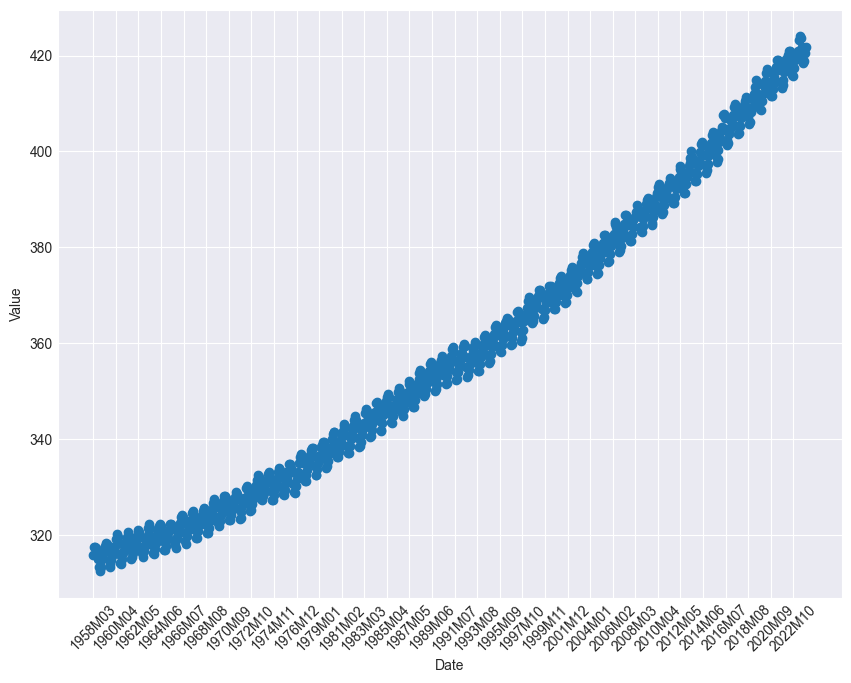

In [70]:
# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(8, 6))
ax_no_outliers.scatter(no_outliers_df['Date'], no_outliers_df['Value'])
ax_no_outliers.set_xlabel('Date')
ax_no_outliers.set_ylabel('Value')
plt.xticks(no_outliers_df['Date'][::25], rotation=45)
plt.show()

In [62]:
threshold = 2
count_under_threshold = (df['Value'] < threshold).sum()
total_values = len(df)
percentage_under_threshold = (count_under_threshold / total_values) * 100
percentage_under_threshold

49.681528662420384

In [ ]:
# Plotting the percentage in a bar plot
#plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
#plt.bar(['Under Threshold', 'Above Threshold'], [percentage_under_threshold, 100 - percentage_under_threshold], color=['blue', 'green'])
#plt.ylabel('Percentage')
#plt.title(f'Percentage of values under threshold for {df["Value"].name}')  # Corrected title formatting
#plt.show()

##### On remarque que quasiment la moitié des valeurs de notre DataFrame sont des valeurs inférieures à notre seuil de 2, que l'on considère comme des valeurs aberrantes.

##### Pour une meilleure lisibilité du graphique nous allons créer une nouvelle colonne 'Year' à laquelle nous ferons coincider la valeur moyenne de l'année. 

In [75]:
no_outliers_df['Year'] = no_outliers_df['Date'].str[:4] #Création de la colonne 'Year'
grouped_data = no_outliers_df.groupby('Year')['Value'].mean() #Regroupement des valeurs moyennes de concentrations de CO2 par année. 
grouped_data

Year
1958    315.232000
1959    315.980833
1960    316.910000
1961    317.644167
1962    318.454167
           ...    
2019    411.649167
2020    414.210833
2021    416.413333
2022    418.528333
2023    421.079167
Name: Value, Length: 66, dtype: float64

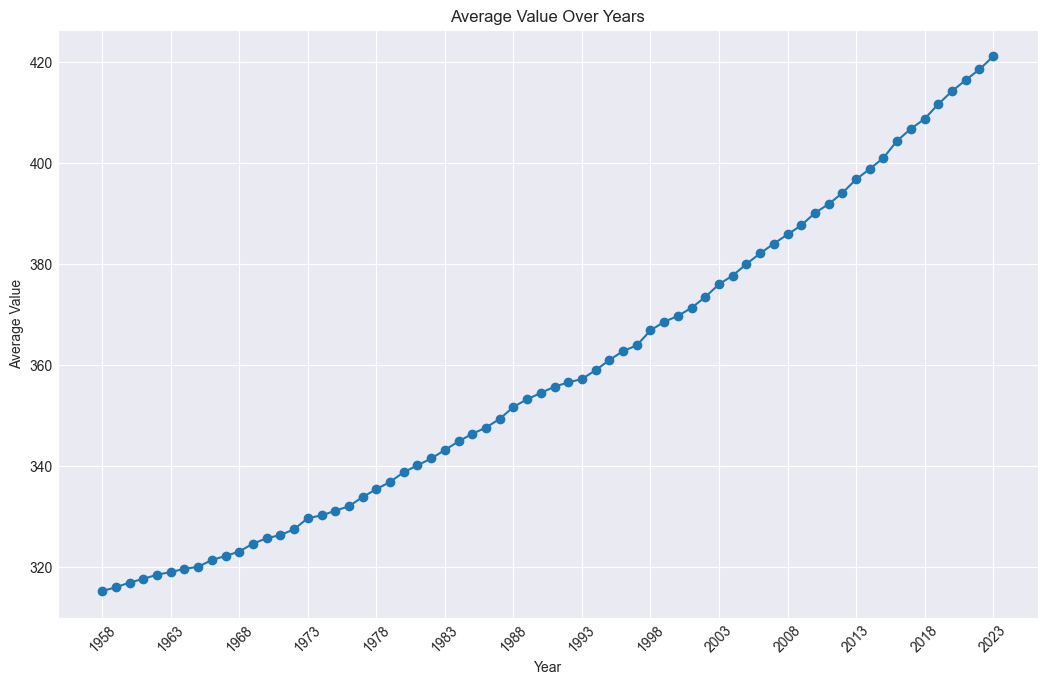

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_data.index[::5], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

##### La concentration de CO2 est croissante depuis les années 1958 et semble suivre une fonction linéaire. Ceci correspond à une tendance globale et mondiale mais qu'en est-t-il des tendances par pays ?

In [85]:
CO2_by_country_df = pd.concat([atmospheric_CO2_Concentrations_df['Country'], atmospheric_CO2_Concentrations_df['Date'], atmospheric_CO2_Concentrations_df['Value']], axis=1)

In [89]:
CO2_by_country_df.nunique()

Country      1
Date       791
Value      868
dtype: int64

##### Nous n'avons pour le moment pas de données par pays. 